<a href="https://colab.research.google.com/github/Amakudegloria/Python-Group-Study/blob/master/Wish_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

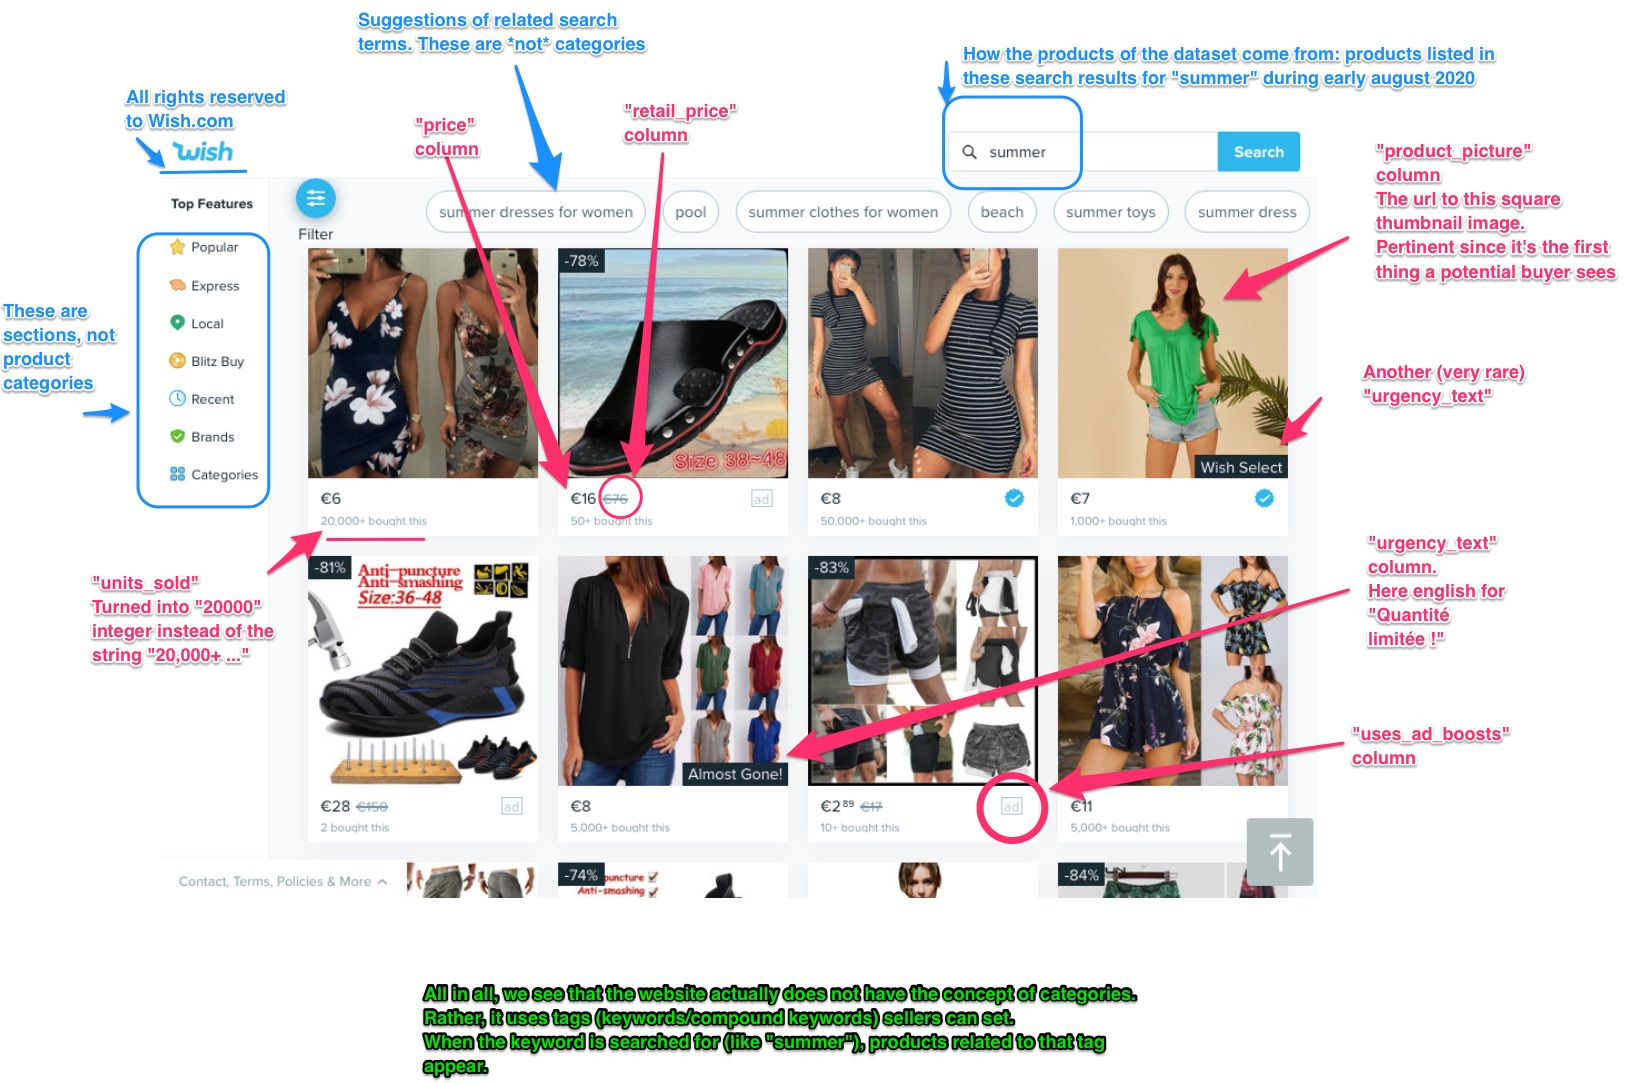

# **Wish Sales data**
The data comes from the Wish platform.
Basically, the products listed in the dataset are those that would appear if you type "summer" in the search field of the platform.
The data was scraped with french as settings (hence the presence of some non-ascii latin characters such as « é » and « à ») in the title column.
This dataset contains product listings as well as products ratings and sales performance, which you would not find in other datasets.



## **Goal**
1. know what sells well and what does not.
2. look for correlations and patterns regarding the success of a product and the various components.
3. How about trying to validate the established idea of human sensitiveness to price drops ? (discounted price compared to original retail_price)
4. You may look for top categories of products so that you know what sells best
5. Do bad products sell ?
6. How about the relationship between the quality of a product (ratings) and its success ? 
7. Does the price factor into this ?
8. Do seller's fame factor into top products ? 
9. Do the number of tags (making a product more discoverable) factor into the success of a product ? 
10. Expected Submission What should users submit? 
11. Should they solve the task primarily using Notebooks or Datasets? 
12. What should the solution contain? 
13. How well is a product likely to sell ?
14. build a model that can help predict how well a product is going to sell.
15. A model that can as well adjust how much of a product should be kept in stock.

# **Task**
### **Develop a model for product success**
Help businesses answer the crucial question "How well is a product likely to sell ?"

### **Task Details**
Re-stocking products with the best potential is crucial for shops and businesses around the world.

Through this dataset and task, you are requested to build a model that can help predict how well a product is going to sell.

Such a model has many implications and could be used in many different ways, the most straightforward being to adjust how much of a product should be kept in stock.

This would allow you to better understand e-commerce sales and get you a certain expertise for helping businesses optimize their stocks and sales.

###**Inspiration**
How about trying to validate the established idea of human sensitiveness to price drops ?
You may look for top categories of products so that you know what sells best
Do bad products sell ? How about the relationship between the quality of a product (ratings) and its success ? Does the price factor into this ?
Do seller's fame factor into top products ?
Do the number of tags (making a product more discoverable) factor into the success of a product ?
Expected Submission
What should users submit? Should they solve the task primarily using Notebooks or Datasets? What should the solution contain?

You may solve this task using a notebook.

###**Evaluation**
What makes a good solution?

Your solution should minimize the risks of:

Buying way too much of a product

Ideally, identify products with a higher discount regarding the retail price. Practically, this means identifying products where the seller could increase his profit margin without losing too many buyers. See the concept of Price Elasticity of the demande

Lastly. There are always a lot of product opportunities, so missing on a single opportunity is better than buying way too much another product, since this might cancel out the profits gained elsewhere.

**Your model will be evaluated on another similar dataset (same features and columns) to see how well it performs on new other data.**

**Note:**
The title_orig on the other hand contains the original title (the base title) that is displayed by default. When a translation is provided by the seller, it appears in the title column. When the title and title_orig columns are the same, it generally means that the seller did not specify a translation that would be displayed to users with french settings.

# **Import Packages**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import datetime
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from dateutil.relativedelta import relativedelta
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Load Dataset**

In [42]:
Wish = pd.read_csv("https://github.com/Amakudegloria/My-Projects/blob/master/summer-products-with-rating-and-performance_2020-08.csv?raw=true")


# **Exploration**

In [47]:
Wish.head(10)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,0.0,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
5,Plus la taille d'été femmes décontracté sans m...,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,EUR,10,0,5.00,1,1.0,0.0,0.0,0.0,0.0,0,0,0,0,"Deep V-Neck,Summer,Plus Size,Spaghetti Strap,O...",navyblue,Size-XS,1,Livraison standard,1,0,40,50,0.0,NaN,CN,zhoulinglinga,zhoulinglinga,75 % avis positifs (65 notes),65,3.507692,5e4b9c3801ba9d210036fc5a,0,NaN,https://www.wish.com/c/5ec645bafd107a02279c8c54,https://contestimg.wish.com/api/webimage/5ec64...,5ec645bafd107a02279c8c54,summer,2020-08
6,Women Fashion Loose Lace Blouse Blouse V Neck ...,Women Fashion Loose Lace Blouse V Neck Bat Sle...,7.00,6,EUR,50000,0,3.84,6742,3172.0,1352.0,971.0,490.0,757.0,0,0,0,0,"blouse,Women,lace t shirt,summer t-shirts,Lace...",white,XS,50,Livraison standard,2,0,31,50,0.0,

In [4]:
Wish.shape

(1573, 43)

In [ ]:
Wish.describe(include='all')

In [7]:
Wish.describe(include='all').loc['count']

title                           1573
title_orig                      1573
price                           1573
retail_price                    1573
currency_buyer                  1573
units_sold                      1573
uses_ad_boosts                  1573
rating                          1573
rating_count                    1573
rating_five_count               1528
rating_four_count               1528
rating_three_count              1528
rating_two_count                1528
rating_one_count                1528
badges_count                    1573
badge_local_product             1573
badge_product_quality           1573
badge_fast_shipping             1573
tags                            1573
product_color                   1532
product_variation_size_id       1559
product_variation_inventory     1573
shipping_option_name            1573
shipping_option_price           1573
shipping_is_express             1573
countries_shipped_to            1573
inventory_total                 1573
h

In [8]:
Wish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [ ]:
Wish['location'].unique()

In [37]:
Wish.isnull().any()

title                           False
title_orig                      False
price                           False
retail_price                    False
currency_buyer                  False
units_sold                      False
uses_ad_boosts                  False
rating                          False
rating_count                    False
rating_five_count               False
rating_four_count               False
rating_three_count              False
rating_two_count                False
rating_one_count                False
badges_count                    False
badge_local_product             False
badge_product_quality           False
badge_fast_shipping             False
tags                            False
product_color                    True
product_variation_size_id        True
product_variation_inventory     False
shipping_option_name            False
shipping_option_price           False
shipping_is_express             False
countries_shipped_to            False
inventory_to

In [40]:
Wish.isnull().sum() #to show null values for each columns

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                  0
rating_four_count                  0
rating_three_count                 0
rating_two_count                   0
rating_one_count                   0
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [39]:
Wish.isna().sum() 

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                  0
rating_four_count                  0
rating_three_count                 0
rating_two_count                   0
rating_one_count                   0
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [11]:
Wish.isnull().sum().sum() 

3849

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0be23c42e8>,
      dtype=object)

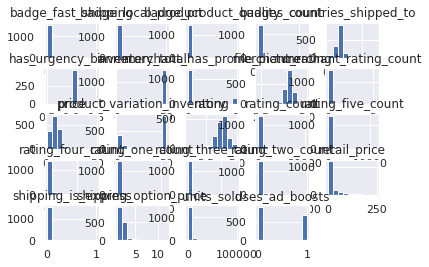

In [13]:
Wish.hist() #check if dataset is right skewed

# **Data Cleaning**

In [18]:
Wish['rating_five_count'] = Wish['rating_five_count'].fillna(0)

In [20]:
Wish['rating_four_count'] = Wish['rating_four_count'].fillna(0)

In [21]:
Wish['rating_three_count'] = Wish['rating_three_count'].fillna(0)

In [22]:
Wish['rating_two_count'] = Wish['rating_two_count'].fillna(0)

In [23]:
Wish['rating_one_count'] = Wish['rating_one_count'].fillna(0)

In [35]:
Wish['merchant_info_subtitle'] = Wish['merchant_info_subtitle'].fillna(Wish['merchant_rating_count'])

In [38]:
Wish['merchant_name'] = Wish['merchant_name'].fillna(Wish['merchant_title'])

In [46]:
Wish['has_urgency_banner'] = Wish['has_urgency_banner'].fillna(0)

In [48]:
urgency_text

In [49]:
Wish['urgency_text'].unique()

array(['Quantité limitée !', nan, 'Réduction sur les achats en gros'],
      dtype=object)

#**TASK**

##**what sells well and what does not.**

In [50]:
Wish.head(10)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,0.0,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
5,Plus la taille d'été femmes décontracté sans m...,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,EUR,10,0,5.00,1,1.0,0.0,0.0,0.0,0.0,0,0,0,0,"Deep V-Neck,Summer,Plus Size,Spaghetti Strap,O...",navyblue,Size-XS,1,Livraison standard,1,0,40,50,0.0,NaN,CN,zhoulinglinga,zhoulinglinga,75 % avis positifs (65 notes),65,3.507692,5e4b9c3801ba9d210036fc5a,0,NaN,https://www.wish.com/c/5ec645bafd107a02279c8c54,https://contestimg.wish.com/api/webimage/5ec64...,5ec645bafd107a02279c8c54,summer,2020-08
6,Women Fashion Loose Lace Blouse Blouse V Neck ...,Women Fashion Loose Lace Blouse V Neck Bat Sle...,7.00,6,EUR,50000,0,3.84,6742,3172.0,1352.0,971.0,490.0,757.0,0,0,0,0,"blouse,Women,lace t shirt,summer t-shirts,Lace...",white,XS,50,Livraison standard,2,0,31,50,0.0,

In [54]:
Wish.sort_values(by='units_sold',ascending=False)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
214,Nouveau Aeeival Femmes Vêtements À Manches Lon...,New Aeeival Women Clothing Long Sleeve Autumn ...,8.00,7,EUR,100000,1,3.76,11062,4663.0,2418.0,1868.0,842.0,1271.0,0,0,0,0,"roupas femininas,womens dresses,Lace,gowns,Lon...",light green,M,10,Livraison standard,2,0,38,50,0.0,NaN,CN,"SHENZHEN LONGDRAGON TECHNOLOGY CO.,LTD",shenzhenlongdragontechnologycoltd,"87 % avis positifs (108,048 notes)",108048,4.052504,5417aada4ad3ab27e954b76c,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/54bdf18039b8c045f118936a,https://contestimg.wish.com/api/webimage/54bdf...,54bdf18039b8c045f118936a,summer,2020-08
251,T-shirt à manches courtes en mousseline de soi...,Womens Summer Red White and Blue Chiffon Short...,5.00,33,EUR,100000,0,3.98,13789,6862.0,2836.0,2131.0,901.0,1059.0,0,0,0,0,"Summer,Plus Size,Cotton T Shirt,chiffon,Long S...",orange,S,50,Livraison standard,1,0,41,50,0.0,NaN,CN,bigcompany,bigcompany,"86 % avis positifs (366,898 notes)",366898,4.036081,53082ea15aefb07dfe1f2a4f,0,NaN,https://www.wish.com/c/53897eeeafddf70c91af1cda,https://contestimg.wish.com/api/webimage/53897...,53897eeeafddf70c91af1cda,summer,2020-08
92,Femmes Camisole extensible Spaghetti Strap Lon...,Women Stretchy Camisole Spaghetti Strap Long T...,5.77,48,EUR,100000,0,4.10,20744,11184.0,4152.0,2919.0,1174.0,1315.0,0,0,0,0,"Mini,Strapless Dress,Spaghetti Strap,Tank,Tops...",black,XS,50,Livraison standard,2,0,46,50,0.0,NaN,CN,trendy_world,shanghailalanginternationaltradecoltd,"86 % avis positifs (330,405 notes)",330405,4.067348,53f2beb39020ee03566d6e18,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/544b079d1280fa28eee9b380,https://contestimg.wish.com/api/webimage/544b0...,544b079d1280fa28eee9b380,summer,2020-08
1168,Nouvelle arrivée femmes été sexy robe de soiré...,Women's Summer Sexy Sleeveless Turtleneck Mini...,5.67,19,EUR,100000,0,3.53,18393,6769.0,3404.0,3658.0,2003.0,2559.0,0,0,0,0,"slim dress,Mini,Elegant,Dress,Mini dress,turtl...",grey,M,50,Livraison standard,1,0,37,50,1.0,Quantité limitée !,CN,fashionstore0408,fashionstore0408,"84 % avis positifs (19,248 notes)",19248,3.889131,570f3a713a698c14278bb51e,0,NaN,https://www.wish.com/c/571adeab62cce546f1a46bc0,https://contestimg.wish.com/api/webimage/571ad...,571adeab62cce546f1a46bc0,summer,2020-08
17,2018 New Fashion Women's Tops Sexy Strappy Sle...,2018 New Fashion Women's Tops Sexy Strappy Sle...,5.00,25,EUR,100000,1,3.83,17980,8290.0,3483.0,2951.0,1410.0,1846.0,0,0,0,0,"blouse,Plus Size,Lace,lace top,Tops,Fashion,st...",white,S,50,Livraison standard,1,0,41,50,1.0,Quantité limitée !,CN,leiston,leiston,"84 % avis positifs (139,223 notes)",139223,3.933581,5708773c3c02161b3f8c7900,0,NaN,https://www.wish.com/c/5b07a7c6e997b33c6f9947da,https://contestimg.wish.com/api/webimage/5b07a...,5b07a7c6e997b33c6f9947da,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,Ventilateur personnel USB rechargeable mains l...,Personal Fan USB Rechargeable Hands Free Neckb...,16.00,16,EUR,2,0,5.00,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Mini,Summer,portablefan,usb,minifan,Rechargeab...",NaN,White,10,Livraison standard,5,0,32,50,0.0,NaN,CN,xiaoguiling,xiaoguiling,(6

In [58]:
Wish[Wish['units_sold'] ==100000]

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
17,2018 New Fashion Women's Tops Sexy Strappy Sle...,2018 New Fashion Women's Tops Sexy Strappy Sle...,5.00,25,EUR,100000,1,3.83,17980,8290.0,3483.0,2951.0,1410.0,1846.0,0,0,0,0,"blouse,Plus Size,Lace,lace top,Tops,Fashion,st...",white,S,50,Livraison standard,1,0,41,50,1.0,Quantité limitée !,CN,leiston,leiston,"84 % avis positifs (139,223 notes)",139223,3.933581,5708773c3c02161b3f8c7900,0,NaN,https://www.wish.com/c/5b07a7c6e997b33c6f9947da,https://contestimg.wish.com/api/webimage/5b07a...,5b07a7c6e997b33c6f9947da,summer,2020-08
92,Femmes Camisole extensible Spaghetti Strap Lon...,Women Stretchy Camisole Spaghetti Strap Long T...,5.77,48,EUR,100000,0,4.10,20744,11184.0,4152.0,2919.0,1174.0,1315.0,0,0,0,0,"Mini,Strapless Dress,Spaghetti Strap,Tank,Tops...",black,XS,50,Livraison standard,2,0,46,50,0.0,NaN,CN,trendy_world,shanghailalanginternationaltradecoltd,"86 % avis positifs (330,405 notes)",330405,4.067348,53f2beb39020ee03566d6e18,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/544b079d1280fa28eee9b380,https://contestimg.wish.com/api/webimage/544b0...,544b079d1280fa28eee9b380,summer,2020-08
214,Nouveau Aeeival Femmes Vêtements À Manches Lon...,New Aeeival Women Clothing Long Sleeve Autumn ...,8.00,7,EUR,100000,1,3.76,11062,4663.0,2418.0,1868.0,842.0,1271.0,0,0,0,0,"roupas femininas,womens dresses,Lace,gowns,Lon...",light green,M,10,Livraison standard,2,0,38,50,0.0,NaN,CN,"SHENZHEN LONGDRAGON TECHNOLOGY CO.,LTD",shenzhenlongdragontechnologycoltd,"87 % avis positifs (108,048 notes)",108048,4.052504,5417aada4ad3ab27e954b76c,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/54bdf18039b8c045f118936a,https://contestimg.wish.com/api/webimage/54bdf...,54bdf18039b8c045f118936a,summer,2020-08
251,T-shirt à manches courtes en mousseline de soi...,Womens Summer Red White and Blue Chiffon Short...,5.00,33,EUR,100000,0,3.98,13789,6862.0,2836.0,2131.0,901.0,1059.0,0,0,0,0,"Summer,Plus Size,Cotton T Shirt,chiffon,Long S...",orange,S,50,Livraison standard,1,0,41,50,0.0,NaN,CN,bigcompany,bigcompany,"86 % avis positifs (366,898 notes)",366898,4.036081,53082ea15aefb07dfe1f2a4f,0,NaN,https://www.wish.com/c/53897eeeafddf70c91af1cda,https://contestimg.wish.com/api/webimage/53897...,53897eeeafddf70c91af1cda,summer,2020-08
1018,Femmes dentelle manches courtes hauts hauts ch...,Women Lace Short Sleeve Long Tops Blouse Shirt...,7.00,22,EUR,100000,1,3.82,11913,5355.0,2430.0,1974.0,960.0,1194.0,0,0,0,0,"blouse,Fashion,Shirt,boho,Tops,summer t-shirts...",NaN,S,50,Livraison standard,2,0,46,50,0.0,NaN,CN,ApparelHeaven,primesalecolimited,"90 % avis positifs (320,031 notes)",320031,4.218866,5357bcf2bb72c5504882e889,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/567cb0925ff12c4829f07dfb,https://contestimg.wish.com/api/webimage/567cb...,567cb0925ff12c4829f07dfb,summer,2020-08
1168,Nouvelle arrivée femmes été sexy robe de soiré...,Women's Summer Sexy Sleeveless Turtleneck Mini...,5.67,19,EUR,100000,0,3.53,18393,6769.0,3404.0,3658.0,2003.0,2559.0,0,0,0,0,"slim dress,Mini,Elegant,Dress,Mini dress,turtl...",grey,M,50,Livraison standard,1,0,37,50,1.0,Quantité limitée !,CN,fashionstore0408,fashionstore0408,"84 % avis positifs (19,248 notes)",19248,3.889131,570f3a713a698c14278bb51e,0,NaN,https://www.wish.com

In [57]:
Wish[Wish['units_sold'] ==100000].iloc[0]

title                           2018 New Fashion Women's Tops Sexy Strappy Sle...
title_orig                      2018 New Fashion Women's Tops Sexy Strappy Sle...
price                                                                           5
retail_price                                                                   25
currency_buyer                                                                EUR
units_sold                                                                 100000
uses_ad_boosts                                                                  1
rating                                                                       3.83
rating_count                                                                17980
rating_five_count                                                            8290
rating_four_count                                                            3483
rating_three_count                                                           2951
rating_two_count